In [2]:
# Устанавливаем пакеты  topGO и ALL, hgu95av2.db
if (!requireNamespace(c("ALL", "topGO", "hgu95av2.db"), quietly = TRUE)) {
    BiocManager::install("topGO")
    BiocManager::install("ALL")
    BiocManager::install("hgu95av2.db")
}

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'topGO'

also installing the dependencies ‘graph’, ‘GO.db’, ‘AnnotationDbi’, ‘SparseM’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ff'

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'ALL'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ff'

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'hgu95av2.db'

also installing the dependency ‘org.Hs.eg.db’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ff'



In [3]:
# Подключаем пакеты и получаем данные
library(topGO)
library(ALL)
library(hgu95av2.db)

data(ALL)
data(geneList)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: graph

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes c

In [4]:
# Это наш датасет с лейкемией
ALL

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 128 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 01005 01010 ... LAL4 (128 total)
  varLabels: cod diagnosis ... date last seen (21 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 14684422 16243790 
Annotation: hgu95av2 

In [5]:
# Здесь можно посмотреть основную инфу про этот датасет
# Тут очень много столбцов, самое интересное, что в столбце 
# date last seen есть NA. Догадайтесь сами, почему там стоят NA
head(pData(ALL))

,cod,diagnosis,sex,age,BT,remission,CR,date.cr,t(4;11),t(9;22),⋯,citog,mol.biol,fusion protein,mdr,kinet,ccr,relapse,transplant,f.u,date last seen
,<chr>,<chr>,<fct>,<int>,<fct>,<fct>,<chr>,<chr>,<lgl>,<lgl>,⋯,<chr>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
01005,1005,5/21/1997,M,53,B2,CR,CR,8/6/1997,FALSE,TRUE,⋯,t(9;22),BCR/ABL,p210,NEG,dyploid,FALSE,FALSE,TRUE,BMT / DEATH IN CR,NA
01010,1010,3/29/2000,M,19,B2,CR,CR,6/27/2000,FALSE,FALSE,⋯,simple alt.,NEG,NA,POS,dyploid,FALSE,TRUE,FALSE,REL,8/28/2000
03002,3002,6/24/1998,F,52,B4,CR,CR,8/17/1998,NA,NA,⋯,NA,BCR/ABL,p190,NEG,dyploid,FALSE,TRUE,FALSE,REL,10/15/1999
04006,4006,7/17/1997,M,38,B1,CR,CR,9/8/1997,TRUE,FALSE,⋯,t(4;11),ALL1/AF4,NA,NEG,dyploid,FALSE,TRUE,FALSE,REL,1/23/1998
04007,4007,7/22/1997,M,57,B2,CR,CR,9/17/1997,FALSE,FALSE,⋯,del(6q),NEG,NA,NEG,dyploid,FALSE,TRUE,FALSE,REL,11/4/1997
04008,4008,7/30/1997,M,17,B1,CR,CR,9/27/1997,FALSE,FALSE,⋯,complex alt.,NEG,NA,NEG,hyperd.,FALSE,TRUE,FALSE,REL,12/15/1997


In [6]:
Biobase::exprs(ALL)[1:5, 1:5]

,01005,01010,03002,04006,04007
1000_at,7.597323,7.479445,7.567593,7.384684,7.905312
1001_at,5.046194,4.932537,4.799294,4.922627,4.844565
1002_f_at,3.900466,4.208155,3.886169,4.206798,3.416923
1003_s_at,5.903856,6.169024,5.860459,6.116890,5.687997
1004_at,5.925260,5.912780,5.893209,6.170245,5.615210


In [7]:
# Взглянем по подробнее на наш список генов, который мы загрузили из пакета ALL
# У этого вектора в имене стоит название гена
# А значение - это pvalue
head(geneList)

1095_s_at   1130_at   1196_at 1329_s_at 1340_s_at 1342_g_at 
1.0000000 1.0000000 0.6223795 0.5412240 1.0000000 1.0000000

In [8]:
# С помощью функции topDiffGenes мы можем отсечь незначительно меняющиеся гены
# Как мы видим, всего значимых генов 50 штук
table(topDiffGenes(geneList))


FALSE  TRUE 
  273    50 

In [9]:
# Создадим объект topGOdata
sampleGOdata <- new("topGOdata",
                   ontology = "BP",
                   allGenes = geneList,
                   geneSel = topDiffGenes,
                   nodeSize = 10,
                   annot = annFUN.db,
                   affyLib = affyLib)


Building most specific GOs .....

Warning message in result_fetch(res@ptr, n = n):
“SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery().”
	( 1647 GO terms found. )


Build GO DAG topology ..........

	( 4545 GO terms and 10466 relations. )


Annotating nodes ...............

	( 310 genes annotated to the GO terms. )



In [10]:
# И проведем парочку тестов: Фишера, Колмогорова - Смирнова
resultFisher <- runTest(sampleGOdata, algorithm = "classic", statistic = "fisher")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 988 nontrivial nodes
		 parameters: 
			 test statistic: fisher



In [11]:
resultKS <- runTest(sampleGOdata, algorithm = "classic", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 1110 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing



In [12]:
resultKS.elim <- runTest(sampleGOdata, algorithm = "elim", statistic = "ks")


			 -- Elim Algorithm -- 

		 the algorithm is scoring 1110 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 cutOff: 0.01
			 score order: increasing


	 Level 15:	1 nodes to be scored	(0 eliminated genes)


	 Level 14:	3 nodes to be scored	(0 eliminated genes)


	 Level 13:	12 nodes to be scored	(0 eliminated genes)


	 Level 12:	26 nodes to be scored	(0 eliminated genes)


	 Level 11:	41 nodes to be scored	(0 eliminated genes)


	 Level 10:	69 nodes to be scored	(0 eliminated genes)


	 Level 9:	111 nodes to be scored	(40 eliminated genes)


	 Level 8:	135 nodes to be scored	(69 eliminated genes)


	 Level 7:	169 nodes to be scored	(95 eliminated genes)


	 Level 6:	179 nodes to be scored	(167 eliminated genes)


	 Level 5:	171 nodes to be scored	(167 eliminated genes)


	 Level 4:	117 nodes to be scored	(210 eliminated genes)


	 Level 3:	57 nodes to be scored	(219 eliminated genes)


	 Level 2:	18 nodes to be scored	(233 eliminated genes)


	 Level 1:	1 nodes to be scor

In [13]:
# Выберем самые значимые процессы
allRes <- GenTable(sampleGOdata,
                  classicFisher = resultFisher,
                  classicKS = resultKS,
                  elimKS = resultKS.elim,
                  orderBy = "elimKS",
                  ranksOf = "classicFisher",
                  topNodes = 10)

In [14]:
# Всего табличка у нас получилась весьма не большая
allRes

,GO.ID,Term,Annotated,Significant,Expected,Rank in classicFisher,classicFisher,classicKS,elimKS
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,GO:0051301,cell division,145,16,21.52,952,0.97383,1.0e-07,3.1e-07
2,GO:0031668,cellular response to extracellular stimu...,12,8,1.78,1,4.2e-05,0.00013,0.00013
3,GO:0010389,regulation of G2/M transition of mitotic...,30,7,4.45,260,0.13535,0.00019,0.00019
4,GO:0051726,regulation of cell cycle,134,17,19.88,812,0.86271,2.2e-05,0.00067
5,GO:0140014,mitotic nuclear division,90,6,13.35,982,0.99838,0.00177,0.00177
6,GO:0050851,antigen receptor-mediated signaling path...,11,7,1.63,7,0.00021,0.00208,0.00208
7,GO:0051276,chromosome organization,88,7,13.06,969,0.99261,0.00218,0.00218
8,GO:0048638,regulation of developmental growth,13,3,1.93,426,0.30050,0.00261,0.00261
9,GO:1900221,regulation of amyloid-beta clearance,10,5,1.48,42,0.00827,0.00287,0.00287


Loading required package: Rgraphviz

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:topGO’:

    depth



Attaching package: ‘Rgraphviz’


The following objects are masked from ‘package:IRanges’:

    from, to


The following objects are masked from ‘package:S4Vectors’:

    from, to




$dag
A graphNEL graph with directed edges
Number of Nodes = 28 
Number of Edges = 46 

$complete.dag
[1] "A graph with 28 nodes."


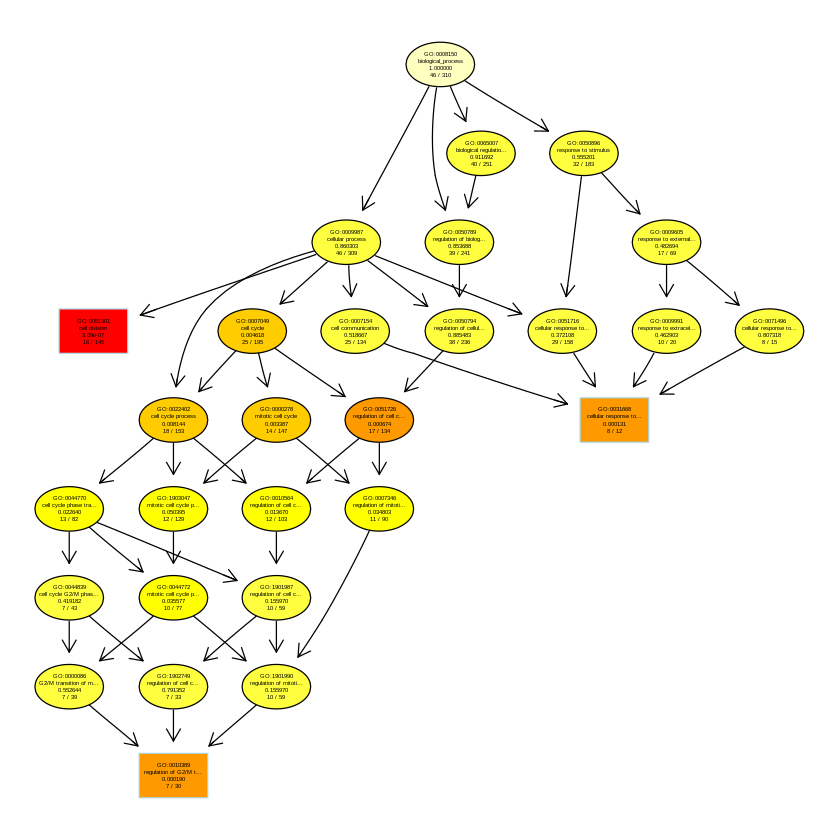

In [17]:
showSigOfNodes(sampleGOdata,
               score(resultKS.elim),
               firstSigNodes = 3,
               useInfo ='all' # j
              )